<a href="https://colab.research.google.com/github/tarungupta61/Airbnb-NYC-2019/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

# Mounting Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Importing Dataset From Drive

In [4]:
df = pd.read_csv('Airbnb NYC 2019.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43411 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43405 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.342700e+04,4.342600e+04,43426.000000,43426.000000,43426.000000,43426.000000,43426.000000,36053.000000,43426.000000,43426.000000
mean,1.699204e+07,5.707059e+07,40.728723,-73.952508,149.571777,7.026136,25.957951,1.281800,6.312762,106.566159
std,9.953051e+06,6.782592e+07,0.054399,0.045207,237.780407,20.968537,46.572629,1.624674,28.468985,130.337427
min,2.539000e+03,2.438000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.369551e+06,6.948271e+06,40.689600,-73.982680,69.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,1.745693e+07,2.591267e+07,40.722470,-73.955650,105.000000,3.000000,7.000000,0.610000,1.000000,32.000000
75%,2.553793e+07,8.414183e+07,40.763220,-73.937170,175.000000,5.000000,28.000000,1.900000,2.000000,213.000000
max,3.365078e+07,2.575691e+08,40.911690,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [8]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43422,33643819,"Premier room in Downtown NY, Two Bridges,China...",253552326.0,Grace,Manhattan,Chinatown,40.71313,-73.99615,Private room,108.0,1.0,11.0,2019-06-23,3.71,4.0,175.0
43423,33644836,"Priv room in an immaculate Apt,near Cent Park,...",76628403.0,Matt,Manhattan,Upper West Side,40.77961,-73.97821,Private room,160.0,2.0,3.0,2019-06-30,1.13,1.0,61.0
43424,33645301,1718公馆套房,119692067.0,Qiulan,Brooklyn,Sunset Park,40.64403,-74.00087,Private room,60.0,1.0,0.0,NaN,NaN,3.0,89.0
43425,33645723,Cute private room in Washington Heights!,112531390.0,Rachel,Manhattan,Washington Heights,40.84427,-73.93742,Private room,52.0,1.0,1.0,2019-04-25,0.40,1.0,0.0
43426,33650779,Central Manhattan Ladies Only (S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

id                                   0
name                                16
host_id                              1
host_name                           22
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       7374
reviews_per_month                 7374
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Taking Necessary Columns Only

In [11]:
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,Private room,149.0,1.0,9.0,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,Private room,150.0,3.0,0.0,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9.0,1.0,0.0


## 1. What can we learn about different hosts and areas?



In [12]:
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
12078,Sonder (NYC),Manhattan,327.0
1673,Blueground,Manhattan,232.0
1672,Blueground,Brooklyn,232.0
6648,Kara,Manhattan,121.0
6836,Kazuya,Brooklyn,103.0


As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground, Michael, David

## 2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [13]:
areas_reviews = new_df.groupby(['neighbourhood_group'])['price'].max().reset_index()
areas_reviews

,neighbourhood_group,price
0,Bronx,2500.0
1,Brooklyn,10000.0
2,Manhattan,10000.0
3,Queens,10000.0
4,Staten Island,5000.0


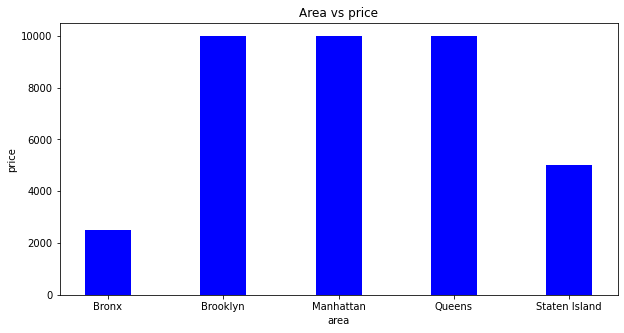

In [14]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['price']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='blue',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("price")
plt.title("Area vs price")
plt.show()

In [15]:
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0.0,95.0
1,10.0,93.0
2,11.0,113.0
3,12.0,8.0
4,15.0,19.0


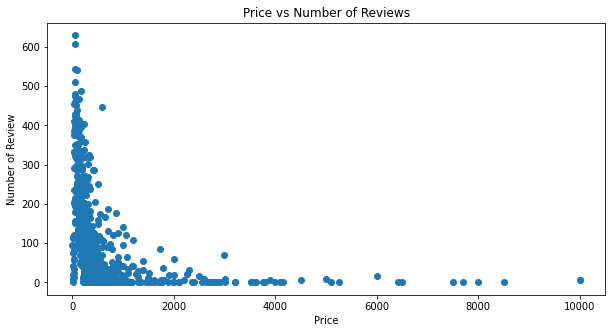

In [16]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

From the above Analysis we can say that most people prefer to stay in place where price is less.


## 3.Which hosts are the busiest and why?



In [17]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
9262,Dona,47621202.0,Private room,629.0
15953,Jj,4734398.0,Private room,607.0
23078,Maya,37312959.0,Private room,543.0
5610,Carol,2369681.0,Private room,540.0
8082,Danielle,26432133.0,Private room,510.0
3542,Asa,12949460.0,Entire home/apt,488.0
34021,Wanda,792159.0,Private room,480.0
20308,Linda,2680820.0,Private room,474.0
7788,Dani,42273.0,Entire home/apt,467.0
2640,Angela,23591164.0,Private room,466.0


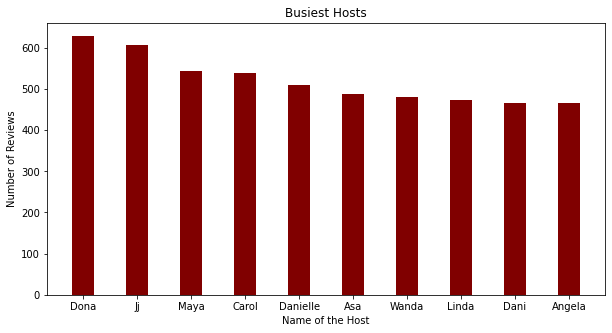

In [18]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

Busiest hosts are:

1.Dona

2.Ji

3.Maya

4.Carol

5.Danielle

Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

# 4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [19]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,11506
4,Brooklyn,Private room,9206
3,Brooklyn,Entire home/apt,8726
7,Manhattan,Private room,7182
10,Queens,Private room,2894
9,Queens,Entire home/apt,1785
1,Bronx,Private room,554
8,Manhattan,Shared room,407
5,Brooklyn,Shared room,343
0,Bronx,Entire home/apt,310


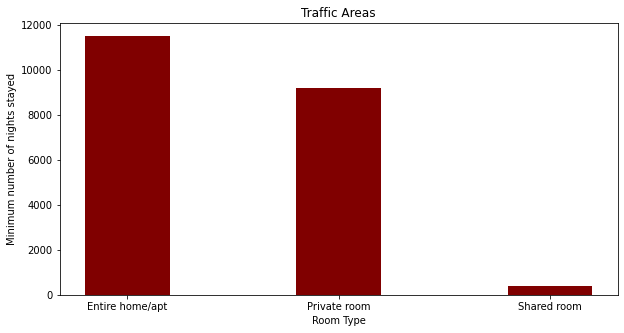

In [20]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

Conclusion:
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.

2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.

3. Most people prefer to pay less price.

4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

5. If people are not staying more then one night means they are travellers.


Thanks